## Inspecting Scraped data from MSCI.com:
- Cleaning by Handling Missing values,duplicated Tickers
- Features Engineering


##NB :
- This scraped data from MSCI.com is from : https://www.kaggle.com/datasets/tonylm00/business-companies-dataset?select=raw.csv
- The process of scraping both MSCI.com and YahooFinance.com and data preparation will take a lot of time ( more than 2 weeks)
- We choosed to use this already scraped data as our base data, then we scrape by ourself the esg scores and metrics data from YahooFinance and merge both of the dataset based on the cleaned tickers of MSCI scraped data in order to build more consistent one
This approach has minimized the time of data preparation phase.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/Scraped_Data_MSCI.csv')



In [ ]:
df.columns

Index(['_id', 'domain', 'name', 'ticker', 'involvement_Alcoholic Beverages',
       'involvement_Adult Entertainment', 'involvement_Gambling',
       'involvement_Tobacco Products', 'involvement_Animal Testing',
       'involvement_Fur and Specialty Leather',
       'involvement_Controversial Weapons', 'involvement_Small Arms',
       'involvement_Catholic Values', 'involvement_GMO',
       'involvement_Military Contracting', 'involvement_Pesticides',
       'involvement_Thermal Coal', 'involvement_Palm Oil', 'employees',
       'industry', 'sector', 'altman_score', 'piotroski_score',
       'Controversies_Environment', 'Controversies_Social',
       'Controversies_Customers', 'Controversies_Human Rights & Community',
       'Controversies_Labor Rights & Supply Chain', 'Controversies_Governance',
       'Decarbonization Target_Target Year',
       'Decarbonization Target_Comprehensiveness',
       'Decarbonization Target_Ambition p.a.',
       'Decarbonization Target_Decarbonization Ta

In [ ]:

# Define function to clean decarbonization target columns
def clean_decarbonization_target(df):
    try:
        df['Decarbonization Target_Target Year'] = df['Decarbonization Target_Target Year'].astype('Int64')
        df['Decarbonization Target_Comprehensiveness'] = df['Decarbonization Target_Comprehensiveness'].replace('t\n', '', regex=True)
        df['Decarbonization Target_Comprehensiveness'] = df['Decarbonization Target_Comprehensiveness'].str.replace('%', '').astype(float)
        df['Decarbonization Target_Ambition p.a.'] = df['Decarbonization Target_Ambition p.a.'].astype(str).str.replace('%', '').astype(float)
    except KeyError:
        pass
    return df

# Define function to merge multiple columns into a single column based on specific criteria
def merge_columns_function(row, columns):
    try:
        if any(row[col] == 'Yes' for col in columns):
            return 'Yes'
        if any(row[col] == 'No' for col in columns):
            return 'No'
    except KeyError:
        pass
    return np.nan

# Define function to merge involvement columns
def merge_involvement(df):
    merge_columns = {
        'Weapons involvement': [
            'involvement_msci_Controversial Weapons',
            'involvement_Controversial Weapons',
            'involvement_Small Arms',
            'involvement_Military Contracting'
        ],
        'Gambling involvement': [
            'involvement_Gambling',
            'involvement_msci_Gambling',
            'involvement_Adult Entertainment'
        ],
        'Tobacco involvement': [
            'involvement_msci_Tobacco Products',
            'involvement_Tobacco Products'
        ],
        'Alcoholic involvement': [
            'involvement_Alcoholic Beverages',
            'involvement_msci_Alcoholic Beverages'
        ],
        'Environment involvement': [
            'involvement_Pesticides',
            'involvement_Thermal Coal',
            'involvement_Palm Oil',
            'involvement_GMO',
            'involvement_Animal Testing',
            'involvement_Fur and Specialty Leather'
        ]
    }

    for new_col, cols_to_merge in merge_columns.items():
        df[new_col] = df.apply(lambda row: merge_columns_function(row, cols_to_merge), axis=1)

    cols_to_drop = [
        'involvement_Alcoholic Beverages',
        'involvement_Adult Entertainment',
        'involvement_Gambling',
        'involvement_Tobacco Products',
        'involvement_Animal Testing',
        'involvement_Fur and Specialty Leather',
        'involvement_Controversial Weapons',
        'involvement_Small Arms',
        'involvement_Catholic Values',
        'involvement_GMO',
        'involvement_Military Contracting',
        'involvement_Pesticides',
        'involvement_Thermal Coal',
        'involvement_Palm Oil',
        'involvement_msci_Controversial Weapons',
        'involvement_msci_Gambling',
        'involvement_msci_Tobacco Products',
        'involvement_msci_Alcoholic Beverages',
        'involvement'
    ]
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    return df

# Define function to impute missing values in controversy columns with 'White'
def controversies_imputation(dataframe):
    controversy_columns = [
        'Controversies_Supply Chain Labor Standards',
        'Controversies_Health & Safety',
        'Controversies_Discrimination & Workforce Diversity',
        'Controversies_Labor Management Relations',
        'Controversies_Anticompetitive Practices',
        'Controversies_Privacy & Data Security',
        'Controversies_Bribery & Fraud',
        'Controversies_Governance Structures',
        'Controversies_Customer Relations',
        'Controversies_Product Safety & Quality',
        'Controversies_Human Rights Concerns',
        'Controversies_Energy & Climate Change',
        'Controversies_Toxic Emissions & Waste',
        'Controversies_Impact on Local Communities',
        'Controversies_Biodiversity & Land Use',
        'Controversies_Other',
        'Controversies_Marketing & Advertising',
        'Controversies_Civil Liberties',
        'Controversies_Operational Waste (Non-Hazardous)',
        'Controversies_Collective Bargaining & Union',
        'Controversies_Supply Chain Management',
        'Controversies_Water Stress',
        'Controversies_Child Labor',
        'Controversies_Controversial Investments'
    ]

    for col in controversy_columns:
        dataframe[col] = dataframe[col].fillna('White')

    return dataframe

# Define function to drop controversy columns
def drop_controversies_columns(df):
    cols = [
        'Controversies_Supply Chain Labor Standards',
        'Controversies_Collective Bargaining & Union',
        'Controversies_Health & Safety',
        'Controversies_Discrimination & Workforce Diversity',
        'Controversies_Labor Management Relations',
        'Controversies_Anticompetitive Practices',
        'Controversies_Privacy & Data Security',
        'Controversies_Bribery & Fraud',
        'Controversies_Governance Structures',
        'Controversies_Customer Relations',
        'Controversies_Product Safety & Quality',
        'Controversies_Human Rights Concerns',
        'Controversies_Energy & Climate Change',
        'Controversies_Toxic Emissions & Waste',
        'Controversies_Impact on Local Communities',
        'Controversies_Biodiversity & Land Use',
        'Controversies_Other',
        'Controversies_Marketing & Advertising',
        'Controversies_Civil Liberties',
        'Controversies_Operational Waste (Non-Hazardous)',
        'Controversies_Supply Chain Management',
        'Controversies_Water Stress',
        'Controversies_Child Labor',
        'Controversies_Controversial Investments'
    ]

    return df.drop(columns=cols)

# Define function to encode involvement columns
def involvement_encoding(df):
    cols = [
        'Weapons involvement',
        'Gambling involvement',
        'Tobacco involvement',
        'Alcoholic involvement',
        'Environment involvement'
    ]

    for col in cols:
        df[col] = df[col].replace('Yes', 1.0).replace('No', 0.01)

    return df

# Define function to encode color-based controversy columns
def encoding_colors(df):
    cols = [
        'Controversies_Environment',
        'Controversies_Social',
        'Controversies_Customers',
        'Controversies_Human Rights & Community',
        'Controversies_Labor Rights & Supply Chain',
        'Controversies_Governance'
    ]
    for col in cols:
        try:
            df[col] = df[col].replace('Green', 0.01).replace('Yellow', 0.34).replace('Orange', 0.67).replace('Red', 1.0)
        except KeyError:1
            pass
    return df

# Define function to encode SDG alignment columns
def encoding_aligned_no(df):
    cols = [
        'sdg_No Poverty',
        'sdg_No Hunger',
        'sdg_Good Health and Well-Being',
        'sdg_Quality Education',
        'sdg_Gender Equality',
        'sdg_Clean Water and Sanitation',
        'sdg_Affordable and Clean Energy',
        'sdg_Decent Work and Economic Growth',
        'sdg_Industry, Innovation and Infrastructure',
        'sdg_Reduced Inequalities',
        'sdg_Sustainable Cities and Communities',
        'sdg_Responsible Consumption and Production',
        'sdg_Climate Action',
        'sdg_Life under Water',
        'sdg_Life on Land',
        'sdg_Peace, Justice and Strong Institutions',
        'sdg_Partnerships for the Goals'
    ]

    for col in cols:
        df[col] = df[col].replace('No', 1.0).replace('Aligned', 0.5).replace('Strongly Aligned', 0.01)

    return df

# Define function to create weighted controversy metric
def create_weighted_controversy_metric(df):
    weights = {
        'Controversies_Environment': 1.0,
        'Controversies_Social': 1.0,
        'Controversies_Customers': 1.0,
        'Controversies_Human Rights & Community': 1.0,
        'Controversies_Labor Rights & Supply Chain': 1.0,
        'Controversies_Governance': 1.0,
    }

    for col in weights.keys():
        if col not in df.columns:
            raise ValueError(f"{col} not found in DataFrame")

    df['controversies_metric'] = sum(df[col] * weight for col, weight in weights.items())

    return df.drop(columns=list(weights.keys()))



In [ ]:
 #Define function to create weighted SDG metric
def create_weighted_sdg_metric(df):
    sdg_weights = {
        'sdg_No Poverty': 1.0,
        'sdg_No Hunger': 1.0,
        'sdg_Good Health and Well-Being': 1.0,
        'sdg_Quality Education': 1.0,
        'sdg_Gender Equality': 1.0,
        'sdg_Clean Water and Sanitation': 1.0,
        'sdg_Affordable and Clean Energy': 1.0,
        'sdg_Decent Work and Economic Growth': 1.0,
        'sdg_Industry, Innovation and Infrastructure': 1.0,
        'sdg_Reduced Inequalities': 1.0,
        'sdg_Sustainable Cities and Communities': 1.0,
        'sdg_Responsible Consumption and Production': 1.0,
        'sdg_Climate Action': 1.0,
        'sdg_Life under Water': 1.0,
        'sdg_Life on Land': 1.0,
        'sdg_Peace, Justice and Strong Institutions': 1.0,
        'sdg_Partnerships for the Goals': 1.0,
    }

    for col in sdg_weights.keys():
        if col not in df.columns:
            raise ValueError(f"{col} not found in DataFrame")

    df['sdg_metric'] = sum(df[col] * weight for col, weight in sdg_weights.items())

    return df.drop(columns=list(sdg_weights.keys()))

# Function to create weighted metrics and merge by ESG categories
def merge_by_esg(df):
    environmental_weights = {
        'Controversies_Environment': 1.0,
        'sdg_Affordable and Clean Energy': 1.0,
        'sdg_Clean Water and Sanitation': 1.0,
        'sdg_Climate Action': 1.0,
        'sdg_Life under Water': 1.0,
        'sdg_Life on Land': 1.0
    }

    social_weights = {
        'Controversies_Social': 1.0,
        'Controversies_Customers': 1.0,
        'Controversies_Human Rights & Community': 1.0,
        'Controversies_Labor Rights & Supply Chain': 1.0,
        'sdg_No Poverty': 1.0,
        'sdg_No Hunger': 1.0,
        'sdg_Good Health and Well-Being': 1.0,
        'sdg_Quality Education': 1.0,
        'sdg_Gender Equality': 1.0,
        'sdg_Decent Work and Economic Growth': 1.0,
        'sdg_Reduced Inequalities': 1.0,
        'sdg_Sustainable Cities and Communities': 1.0,
        'sdg_Peace, Justice and Strong Institutions': 1.0,
        'sdg_Responsible Consumption and Production': 1.0
    }

    governance_weights = {
        'Controversies_Governance': 1.0,
        'sdg_Partnerships for the Goals': 1.0,
        'sdg_Industry, Innovation and Infrastructure': 1.0,
    }

    # Create metrics and drop original columns
    df = create_weighted_metric(df, environmental_weights, 'environmental_metric')
    df = create_weighted_metric(df, social_weights, 'social_metric')
    df = create_weighted_metric(df, governance_weights, 'governance_metric')

    return df

# Function to create a weighted metric
def create_weighted_metric(df, weights, metric_name):
    for col in weights.keys():
        if col not in df.columns:
            raise ValueError(f"{col} not found in DataFrame")
    df[metric_name] = sum(df[col] * weight for col, weight in weights.items())
    return df.drop(columns=list(weights.keys()))

# Function to clean and prepare the dataset
def clean_with_metrics(df):
    df = df.drop(columns=['_id', 'domain'], errors='ignore')
    df = df.replace('null', np.nan)

    df = df.dropna(subset=['esg'])

    # Drop columns with all NaN values
    df = df.dropna(subset=['ticker'])

    # Format decarbonization columns
    df = clean_decarbonization_target(df)

    # Format employee column
    df['employees'] = df['employees'].astype('Int64')

    # Merge involvement columns
    df = merge_involvement(df)
    df = involvement_encoding(df)

    # Encode controversies columns
    df = encoding_colors(df)

    # Drop cols with only one value
    cols_with_only_one_value = ['Decarbonization Target_Decarbonization Target',
                                'Decarbonization Target_Decarbonization Target on Temperature Rise']
    df = df.drop(columns=cols_with_only_one_value)

    df = encoding_aligned_no(df)

    # Drop columns with less than 500 values
    threshold = 500
    df = df.dropna(thresh=threshold, axis=1)

    df = df.dropna()
    df = merge_by_esg(df)

    return df

# Load the raw data
raw_data = pd.read_csv('/content/Scraped_Data_MSCI.csv')

# Clean and prepare the dataset
cleaned_df = clean_with_metrics(raw_data)

# Save the cleaned data
cleaned_df.to_csv('/content/cleaned_data01.csv', index=False)

# Display the first few rows of the cleaned dataset
cleaned_df.head()

,name,ticker,employees,altman_score,piotroski_score,Decarbonization Target_Target Year,Decarbonization Target_Comprehensiveness,Decarbonization Target_Ambition p.a.,Temperature Goal,esg,Weapons involvement,Gambling involvement,Tobacco involvement,Alcoholic involvement,environmental_metric,social_metric,governance_metric
0,F5 Networks,FFIV,6459,4.08,9.0,2030,1.92,0.91,1.7,17.2,0.01,0.01,0.01,0.01,5.01,8.54,2.01
1,Dell,DELL,120000,1.63,7.0,2050,60.56,-1.71,2.9,14.4,0.01,0.01,0.01,0.01,4.01,8.7,1.51
4,Hewlett Packard,HPQ,58000,1.91,7.0,2040,100.00,-5.56,2.0,12.3,0.01,0.01,0.01,0.01,4.51,9.2,2.01
5,IBM,IBM,282200,3.08,5.0,2030,100.00,-12.50,1.6,14.1,0.01,0.01,0.01,0.01,4.51,10.86,2.01
6,Juniper Networks,JNPR,11144,1.85,5.0,2030,36.58,-1.63,2.3,14.5,0.01,0.01,0.01,0.01,5.01,8.54,2.01


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 0 to 7550
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ticker                                    429 non-null    object 
 1   employees                                 429 non-null    Int64  
 2   altman_score                              429 non-null    float64
 3   piotroski_score                           429 non-null    float64
 4   Decarbonization Target_Target Year        429 non-null    Int64  
 5   Decarbonization Target_Comprehensiveness  429 non-null    float64
 6   Decarbonization Target_Ambition p.a.      429 non-null    float64
 7   Temperature Goal                          429 non-null    float64
 8   esg                                       429 non-null    float64
 9   environmental_metric                      429 non-null    object 
 10  social_metric                             

Insert explication of columns
Insert insuffisance of esg column built using MSCI scraping approach

#Scraping YahooFinance website for more reliable esg risk metrics,level,rating

In [ ]:
!pip install selenium
!apt-get update
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and plat

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
import time

def yahoofinance_scraping(ticker):
    """
    Retrieves ESG data for a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol.

    Returns:
        dict: ESG data including Risk Ratings, Risk Level, Controversy Score, and Controversy Level.
    """
    esg_data = {
        'ticker': ticker,
        'Total ESG Risk Score': None,
        'Percentile': None,
        'Risk Level': None,
        'Controversy Level': None
    }

    url = f"https://finance.yahoo.com/quote/{ticker}/sustainability"

    # browser options
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920,1080")

    # initialize the webdriver
    driver = webdriver.Chrome(options=options)
    driver.get(url)
    action = ActionChains(driver)

    # accept cookies if the button exists
    try:
        cookies_button = driver.find_element(By.NAME, 'agree')
        cookies_button.click()
    except:
        pass

    time.sleep(3)  # wait for the page to load

    try:
        esg_box = driver.find_element(By.CSS_SELECTOR, ".svelte-1hj9jti")
        esg_risk_score = esg_box.find_element(By.CSS_SELECTOR, ".perf").text
        percentile = esg_box.find_element(By.CSS_SELECTOR, ".scoreRank .svelte-y3c2sq").text
        risk_level = esg_box.find_element(By.CSS_SELECTOR, ".clip").text

        esg_data['Total ESG Risk Score'] = esg_risk_score
        esg_data['Percentile'] = percentile
        esg_data['Risk Level'] = risk_level
    except Exception as e:
        print(f"Error scraping ESG data for {ticker}: {e}")

    try:
        controversy_box = driver.find_element(By.CSS_SELECTOR, ".svelte-1hj9jti:nth-child(1)")
        controversy_level = controversy_box.text
        esg_data['Controversy Level'] = controversy_level
    except Exception as e:
        print(f"Error scraping Controversy Level for {ticker}: {e}")

    driver.quit()
    return esg_data

# Load the dataset
file_path = '/content/cleaned_data02.csv'
df = pd.read_csv(file_path)

# Extract the first 10 tickers
tickers = df['ticker'].tolist()[:10]

# Scrape data for each ticker
esg_results = []

for ticker in tickers:
    data = yahoofinance_scraping(ticker)
    esg_results.append(data)

# Convert the results to a DataFrame
esg_df = pd.DataFrame(esg_results)

# Save the results to a CSV file
esg_df.to_csv('/content/YahooFinance_esg_data.csv', index=False)



### NB : Manually handling the duplicated rows using Excel
### Our objectif is to merge the both datasets to obtain a more consistent dataset that contains all the necessary informations

In [ ]:
msci_df = pd.read_csv('/content/XXXXX 03.csv')
yahoo_df = pd.read_csv('/content/YahooFinance_esg_Data - 03.csv')

### Here's a link of inspecting both datasets and merging both of them : https://colab.research.google.com/drive/1xN7ihqaFL6KX-YRUrc7gheiFZ45Klwa_

### Next steps:
- Upload our latest version of merged dataset
- Build Data_with_links dataset that contains scraped pdfs links of annual reports of companies from responsibility reports
- Extract text of these reports
- Build a colunm extracted text from each company's report

In [ ]:

# Load the dataset
file_path = '/content/Final_Data - with_links_30.csv'
df = pd.read_csv(file_path)

df.head()

,Name,Ticker,Description,Address,Sector,Number Of Employees,Decarbonization_Target Year,Decarbonization_Target_Comprehensiveness,Decarbonization_Target_Ambition p.a.,Temperature_Goal,...,Governance_Involvement_weight_metric,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,PDF Link
0,F5 Inc,FFIV,"F5, Inc. provides multi-cloud application secu...","801 5th Avenue\nSeattle, WA 98104-1663\nUnited...",Technology,6459,2030,1.92,0.91,1.7,...,2.01,17.1,4.1,5.4,7.6,Low,1,23rd percentile,Negligible,https://www.responsibilityreports.com/HostedDa...
1,Oracle Corp,ORCL,Oracle Corporation offers products and service...,"2300 Oracle Way\nAustin, TX 78741\nUnited Stat...",Technology,164000,2050,100.00,-3.57,1.3,...,2.01,14.0,0.5,5.7,7.7,Moderate,2,8th percentile,Low,https://www.responsibilityreports.com/HostedDa...
2,Fortinet Inc,FTNT,"Fortinet, Inc. provides cybersecurity and netw...","899 Kifer Road\nSunnyvale, CA 94086\nUnited St...",Technology,13568,2030,1.16,0.88,1.6,...,2.01,19.0,2.5,6.4,10.0,Low,1,23rd percentile,Low,https://www.responsibilityreports.com/HostedDa...
3,Netapp Inc,NTAP,"NetApp, Inc. provides cloud-led and data-centr...","3060 Olsen Drive\nSan Jose, CA 95128\nUnited S...",Technology,12000,2030,90.37,-3.83,1.7,...,2.01,15.4,2.2,5.5,7.7,Low,1,12th percentile,Low,https://www.responsibilityreports.com/HostedDa...
4,Apple Inc,AAPL,"Apple Inc. designs, manufactures, and markets ...","One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,161000,2030,100.00,-11.58,1.7,...,2.34,17.2,0.5,9.4,7.4,Significant,3,15th percentile,Low,https://www.responsibilityreports.com/HostedDa...


###here’s a link to the visualization of categorical and numeric labels.
https://colab.research.google.com/drive/1NKvuN5XSJJyhJqktng6ERyZgdlG5bOa2#scrollTo=409bdc38-eb0e-4a9e-a5ba-aa97517025c6

[texte du lien](https://)

In [ ]:
pip install pandas requests pymupdf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 61.4 MB/s eta 0:00:00


In [ ]:
import requests
import fitz  # PyMuPDF
import os
import re



df['Extracted_Text'] = ''

pdf_dir = '/content/PDFs'
txt_dir = '/content/TXTs'
os.makedirs(pdf_dir, exist_ok=True)
os.makedirs(txt_dir, exist_ok=True)

def download_pdf(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as f:
        f.write(response.content)

def clean_text(text):
    # Remove illegal characters
    cleaned_text = re.sub(r'[^\x20-\x7E]+', ' ', text)
    return cleaned_text

def convert_pdf_to_text(pdf_path, txt_path):
    text = ""
    try:
        document = fitz.open(pdf_path)
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        cleaned_text = clean_text(text)
        with open(txt_path, 'w', encoding='utf-8') as txt_file:
            txt_file.write(cleaned_text)
    except Exception as e:
        print(f"Error extracting text from {pdf_path}: {e}")
    return cleaned_text

for index, row in df.iterrows():
    pdf_url = row['PDF Link']
    pdf_path = os.path.join(pdf_dir, f"report_{index}.pdf")
    txt_path = os.path.join(txt_dir, f"report_{index}.txt")

    # Download the PDF
    try:
        download_pdf(pdf_url, pdf_path)
        # Convert PDF to text and save it
        extracted_text = convert_pdf_to_text(pdf_path, txt_path)
        # Add the extracted text to the dataframe
        df.at[index, 'Extracted_Text'] = extracted_text
    except Exception as e:
        print(f"Failed to process {pdf_url}: {e}")

output_file_path = '/content/Final_Data-with_text_30.csv'
df.to_csv(output_file_path, index=False)
print(f"Updated dataframe saved to {output_file_path}")


Updated dataframe saved to /content/Final_Data-with_text_30.csv


In [ ]:
file_path = '/content/Final_Data-with_text_30.csv'
data = pd.read_csv(file_path, sep=',')  # Change sep if needed

data.head()

,Name,Ticker,Description,Address,Sector,Number Of Employees,Decarbonization_Target Year,Decarbonization_Target_Comprehensiveness,Decarbonization_Target_Ambition p.a.,Temperature_Goal,...,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,PDF Link,Extracted_Text
0,F5 Inc,FFIV,"F5, Inc. provides multi-cloud application secu...","801 5th Avenue\nSeattle, WA 98104-1663\nUnited...",Technology,6459,2030,1.92,0.91,1.7,...,17.1,4.1,5.4,7.6,Low,1,23rd percentile,Negligible,https://www.responsibilityreports.com/HostedDa...,"Fiscal Year 2022 Environmental, Social & Gove..."
1,Oracle Corp,ORCL,Oracle Corporation offers products and service...,"2300 Oracle Way\nAustin, TX 78741\nUnited Stat...",Technology,164000,2050,100.00,-3.57,1.3,...,14.0,0.5,5.7,7.7,Moderate,2,8th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Corporate Citizenship Report 3 Corporate Citiz...
2,Fortinet Inc,FTNT,"Fortinet, Inc. provides cybersecurity and netw...","899 Kifer Road\nSunnyvale, CA 94086\nUnited St...",Technology,13568,2030,1.16,0.88,1.6,...,19.0,2.5,6.4,10.0,Low,1,23rd percentile,Low,https://www.responsibilityreports.com/HostedDa...,Sustainability report2021 About Fortinet Our ...
3,Netapp Inc,NTAP,"NetApp, Inc. provides cloud-led and data-centr...","3060 Olsen Drive\nSan Jose, CA 95128\nUnited S...",Technology,12000,2030,90.37,-3.83,1.7,...,15.4,2.2,5.5,7.7,Low,1,12th percentile,Low,https://www.responsibilityreports.com/HostedDa...,2022 ESG Report NETAPP 2022 ESG REPORT 2 Conte...
4,Apple Inc,AAPL,"Apple Inc. designs, manufactures, and markets ...","One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,161000,2030,100.00,-11.58,1.7,...,17.2,0.5,9.4,7.4,Significant,3,15th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Apple s 2022 ESG Report Environmental Social G...


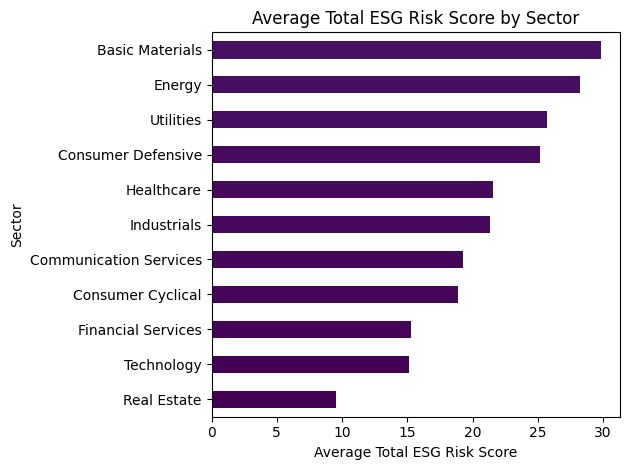

In [ ]:

import matplotlib.pyplot as plt

esg_by_sector = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values()

colors = plt.cm.viridis(range(len(esg_by_sector)))

esg_by_sector.plot(kind='barh', color=colors)
plt.title('Average Total ESG Risk Score by Sector')
plt.xlabel('Average Total ESG Risk Score')
plt.ylabel('Sector')
plt.tight_layout()

# Display the chart
plt.show()


the  bar chart  shows that the Energy sector has the highest average total ESG risk score, followed by Basic Materials

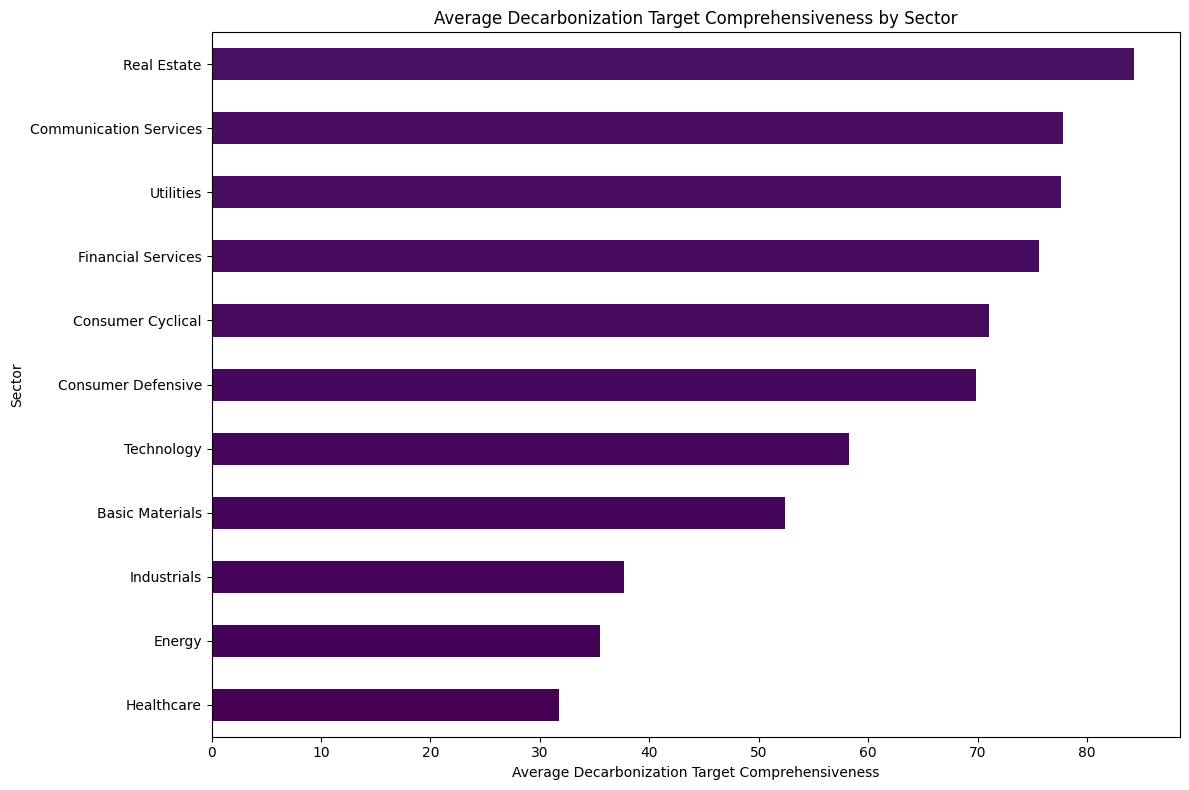

In [ ]:
import matplotlib.pyplot as plt

mean_comprehensiveness_by_sector = data.groupby('Sector')['Decarbonization_Target_Comprehensiveness'].mean().sort_values()

# Create a horizontal bar chart with different colors for each bar
colors = plt.cm.viridis(range(len(mean_comprehensiveness_by_sector)))

# Create the chart
plt.figure(figsize=(12, 8))
mean_comprehensiveness_by_sector.plot(kind='barh', color=colors)
plt.title('Average Decarbonization Target Comprehensiveness by Sector')
plt.xlabel('Average Decarbonization Target Comprehensiveness')
plt.ylabel('Sector')
plt.tight_layout()

# Display the chart
plt.show()


Each bar represents a sector (e.g., healthcare, utilities, transportation) and its height reflects how well those in that sector understand the goals of decarbonization. The higher the bar, the greater the understanding of decarbonization targets within that sector.

In [ ]:
min_employees = data['Number Of Employees'].min()
max_employees = data['Number Of Employees'].max()
print(min_employees)
print(max_employees)


1900
2100000


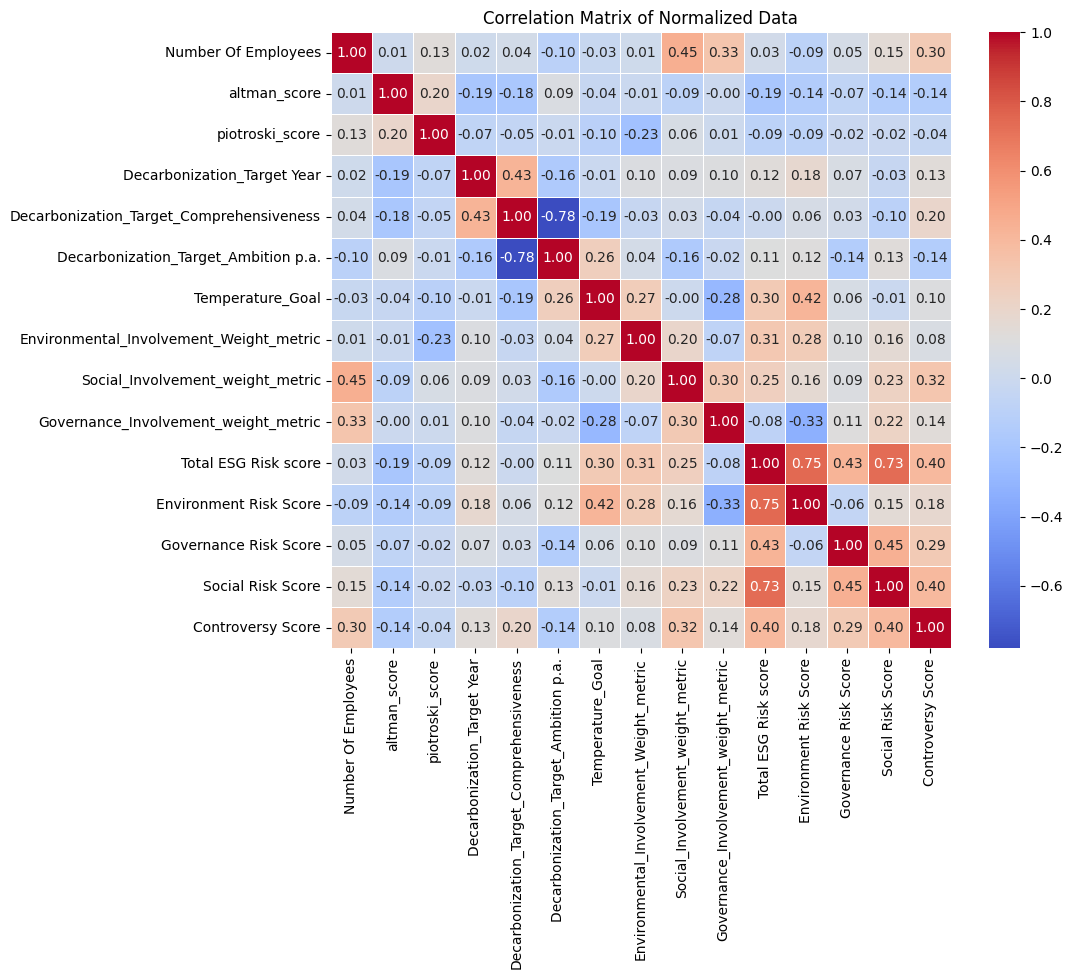

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].min()) / (data[numeric_columns].max() - data[numeric_columns].min())

# Calculate the correlation matrix
corr_matrix = data[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Normalized Data')
plt.show()


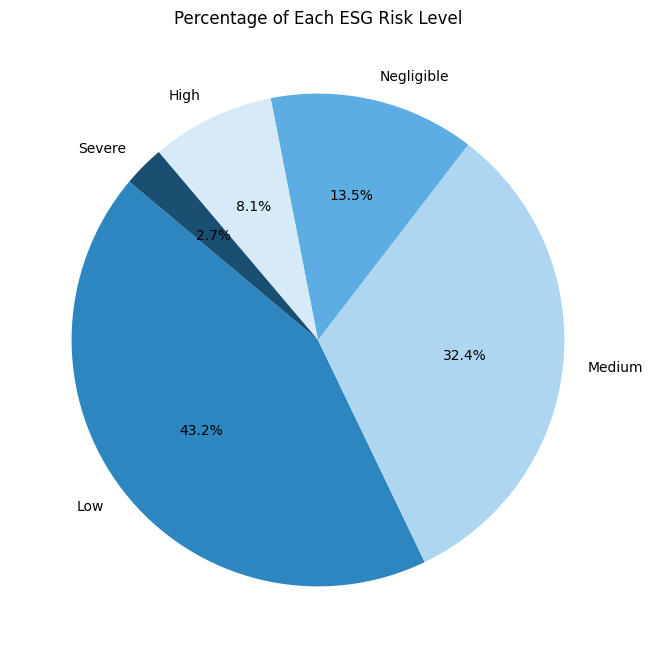

In [ ]:
import matplotlib.pyplot as plt

risk_level_counts = data['ESG Risk Level'].value_counts()

# Calculate the percentages
risk_level_percentages = risk_level_counts / risk_level_counts.sum() * 100

# Plot the pie chart with new colors
plt.figure(figsize=(8, 8))
plt.pie(risk_level_percentages, labels=risk_level_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#2E86C1', '#AED6F1', '#5DADE2', '#D6EAF8', '#1B4F72'])
plt.title('Percentage of Each ESG Risk Level')
plt.show()



The majority of companies (43.2%) fall under the "Low" risk category, while "Severe" and "High" risk categories hold smaller proportions at 2.7% and 8.1%, respectively.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/Final_Data-with_text_30.csv', sep=',')
df.head()


,Name,Ticker,Description,Address,Sector,Number Of Employees,Decarbonization_Target Year,Decarbonization_Target_Comprehensiveness,Decarbonization_Target_Ambition p.a.,Temperature_Goal,...,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,PDF Link,Extracted_Text
0,F5 Inc,FFIV,"F5, Inc. provides multi-cloud application secu...","801 5th Avenue\nSeattle, WA 98104-1663\nUnited...",Technology,6459,2030,1.92,0.91,1.7,...,17.1,4.1,5.4,7.6,Low,1,23rd percentile,Negligible,https://www.responsibilityreports.com/HostedDa...,"Fiscal Year 2022 Environmental, Social & Gove..."
1,Oracle Corp,ORCL,Oracle Corporation offers products and service...,"2300 Oracle Way\nAustin, TX 78741\nUnited Stat...",Technology,164000,2050,100.00,-3.57,1.3,...,14.0,0.5,5.7,7.7,Moderate,2,8th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Corporate Citizenship Report 3 Corporate Citiz...
2,Fortinet Inc,FTNT,"Fortinet, Inc. provides cybersecurity and netw...","899 Kifer Road\nSunnyvale, CA 94086\nUnited St...",Technology,13568,2030,1.16,0.88,1.6,...,19.0,2.5,6.4,10.0,Low,1,23rd percentile,Low,https://www.responsibilityreports.com/HostedDa...,Sustainability report2021 About Fortinet Our ...
3,Netapp Inc,NTAP,"NetApp, Inc. provides cloud-led and data-centr...","3060 Olsen Drive\nSan Jose, CA 95128\nUnited S...",Technology,12000,2030,90.37,-3.83,1.7,...,15.4,2.2,5.5,7.7,Low,1,12th percentile,Low,https://www.responsibilityreports.com/HostedDa...,2022 ESG Report NETAPP 2022 ESG REPORT 2 Conte...
4,Apple Inc,AAPL,"Apple Inc. designs, manufactures, and markets ...","One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,161000,2030,100.00,-11.58,1.7,...,17.2,0.5,9.4,7.4,Significant,3,15th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Apple s 2022 ESG Report Environmental Social G...


In [ ]:
# Check for NaN values in the 'extracted_text' column
nan_rows = df[df['Extracted_Text'].isna()]

# Display the rows with NaN values
print(nan_rows)

                      Name Ticker  \
42  Centerpoint Energy Inc    CNP   

                                          Description  \
42  CenterPoint Energy, Inc. operates as a public ...   

                                              Address     Sector  \
42  1111 Louisiana Street\nHouston, TX 77002\nUnit...  Utilities   

    Number Of Employees  Decarbonization_Target Year  \
42                15001                         2035   

    Decarbonization_Target_Comprehensiveness  \
42                                     39.24   

    Decarbonization_Target_Ambition p.a.  Temperature_Goal  ...  \
42                                 -2.37               1.8  ...   

    Total ESG Risk score  Environment Risk Score  Governance Risk Score  \
42                  26.0                    10.6                    5.4   

    Social Risk Score  Controversy Level  Controversy Score  \
42                9.6           Moderate                  2   

    ESG Risk Percentile ESG Risk Level  \
42      

In [ ]:
df = df.dropna(subset=['Extracted_Text'])
df.head()


,Name,Ticker,Description,Address,Sector,Number Of Employees,Decarbonization_Target Year,Decarbonization_Target_Comprehensiveness,Decarbonization_Target_Ambition p.a.,Temperature_Goal,...,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,PDF Link,Extracted_Text
0,F5 Inc,FFIV,"F5, Inc. provides multi-cloud application secu...","801 5th Avenue\nSeattle, WA 98104-1663\nUnited...",Technology,6459,2030,1.92,0.91,1.7,...,17.1,4.1,5.4,7.6,Low,1,23rd percentile,Negligible,https://www.responsibilityreports.com/HostedDa...,"Fiscal Year 2022 Environmental, Social & Gove..."
1,Oracle Corp,ORCL,Oracle Corporation offers products and service...,"2300 Oracle Way\nAustin, TX 78741\nUnited Stat...",Technology,164000,2050,100.00,-3.57,1.3,...,14.0,0.5,5.7,7.7,Moderate,2,8th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Corporate Citizenship Report 3 Corporate Citiz...
2,Fortinet Inc,FTNT,"Fortinet, Inc. provides cybersecurity and netw...","899 Kifer Road\nSunnyvale, CA 94086\nUnited St...",Technology,13568,2030,1.16,0.88,1.6,...,19.0,2.5,6.4,10.0,Low,1,23rd percentile,Low,https://www.responsibilityreports.com/HostedDa...,Sustainability report2021 About Fortinet Our ...
3,Netapp Inc,NTAP,"NetApp, Inc. provides cloud-led and data-centr...","3060 Olsen Drive\nSan Jose, CA 95128\nUnited S...",Technology,12000,2030,90.37,-3.83,1.7,...,15.4,2.2,5.5,7.7,Low,1,12th percentile,Low,https://www.responsibilityreports.com/HostedDa...,2022 ESG Report NETAPP 2022 ESG REPORT 2 Conte...
4,Apple Inc,AAPL,"Apple Inc. designs, manufactures, and markets ...","One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,161000,2030,100.00,-11.58,1.7,...,17.2,0.5,9.4,7.4,Significant,3,15th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Apple s 2022 ESG Report Environmental Social G...


## Testing ESG-Bert ability to classify the extracted text into some esg topics  labels (in order to map these labels into ESRS standards of CSRD reporting )

### Our main objectif now , is to build dataset that contains vocabulrary details of ESRS labels

here's a notebook that explore the capibility of esg-bert to classify the reporting texts
https://colab.research.google.com/drive/11htuthXhCbtxAcdRriMnw9qH8Nj_-eky#scrollTo=95oXKBAywwIb

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from tika import parser
import re
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("nbroad/ESG-BERT")

model = AutoModelForSequenceClassification.from_pretrained("nbroad/ESG-BERT")

# Create the pipeline for text classification
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer,truncation=True, padding='max_length', max_length=512)

In [ ]:
pip install tika==1.23


  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-1.23-py3-none-any.whl size=31849 sha256=a94622f902ed51369f1e184e401234d04220323ea29c5e1e60367221636f00d3
  Stored in directory: /root/.cache/pip/wheels/db/55/23/da0c8aa711f2358e53313044c3ec21d9d6a7d348b81c6004d4
Successfully built tika


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "nbroad/ESG-BERT"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
labels = model.config.id2label
print(labels)


{0: 'Business_Ethics', 1: 'Data_Security', 2: 'Access_And_Affordability', 3: 'Business_Model_Resilience', 4: 'Competitive_Behavior', 5: 'Critical_Incident_Risk_Management', 6: 'Customer_Welfare', 7: 'Director_Removal', 8: 'Employee_Engagement_Inclusion_And_Diversity', 9: 'Employee_Health_And_Safety', 10: 'Human_Rights_And_Community_Relations', 11: 'Labor_Practices', 12: 'Management_Of_Legal_And_Regulatory_Framework', 13: 'Physical_Impacts_Of_Climate_Change', 14: 'Product_Quality_And_Safety', 15: 'Product_Design_And_Lifecycle_Management', 16: 'Selling_Practices_And_Product_Labeling', 17: 'Supply_Chain_Management', 18: 'Systemic_Risk_Management', 19: 'Waste_And_Hazardous_Materials_Management', 20: 'Water_And_Wastewater_Management', 21: 'Air_Quality', 22: 'Customer_Privacy', 23: 'Ecological_Impacts', 24: 'Energy_Management', 25: 'GHG_Emissions'}


In [ ]:
def classify_sentences(text, classifier, tokenizer, max_length=512):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    classifications = []
    for sentence in sentences:
        if sentence:
            tokens = tokenizer(sentence, truncation=True, padding='max_length', max_length=max_length, return_tensors="pt")['input_ids']
            if tokens.shape[1] > max_length:
                chunks = [sentence[i:i+max_length] for i in range(0, len(sentence), max_length)]
                for chunk in chunks:
                    result = classifier(chunk)[0]
                    classifications.append((chunk, result['label']))
            else:
                result = classifier(sentence)[0]
                classifications.append((sentence, result['label']))
    return classifications

In [ ]:
esg_labels = [
    'Business_Ethics', 'Data_Security', 'Access_And_Affordability', 'Business_Model_Resilience',
    'Competitive_Behavior', 'Critical_Incident_Risk_Management', 'Customer_Welfare', 'Director_Removal',
    'Employee_Engagement_Inclusion_And_Diversity', 'Employee_Health_And_Safety', 'Human_Rights_And_Community_Relations',
    'Labor_Practices', 'Management_Of_Legal_And_Regulatory_Framework', 'Physical_Impacts_Of_Climate_Change',
    'Product_Quality_And_Safety', 'Product_Design_And_Lifecycle_Management', 'Selling_Practices_And_Product_Labeling',
    'Supply_Chain_Management', 'Systemic_Risk_Management', 'Waste_And_Hazardous_Materials_Management',
    'Water_And_Wastewater_Management', 'Air_Quality', 'Customer_Privacy', 'Ecological_Impacts',
    'Energy_Management', 'GHG_Emissions'
]

In [ ]:
for label in esg_labels:
    sample_df[label] = ''

for index, row in sample_df.iterrows():
    text = row['Extracted_Text']
    classifications = classify_sentences(text, classifier, tokenizer)

    # Append classified sentences to respective ESG label columns
    for sentence, label in classifications:
        sample_df.at[index, label] += sentence + ' '

In [ ]:

output_file_path = '/content/Sample5_Classified_ESG_Text.csv'
sample_df.to_csv(output_file_path, index=False)

In [ ]:
sample_df = df.sample(n=5, random_state=42)
sample_df

,Name,Ticker,Description,Address,Sector,Number Of Employees,Decarbonization_Target Year,Decarbonization_Target_Comprehensiveness,Decarbonization_Target_Ambition p.a.,Temperature_Goal,...,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,PDF Link,Extracted_Text
79,United Parcel Service Cl B,UPS,"United Parcel Service, Inc., a package deliver...","55 Glenlake Parkway, N.E.\nAtlanta, GA 30328\n...",Industrials,500000,2035,46.71,-0.87,1.9,...,20.0,4.6,5.4,9.6,Moderate,2,24th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Creating Equitable a more and Just World 2021...
10,Nasdaq Inc,NDAQ,"Nasdaq, Inc. operates as a technology company ...","151 West 42nd Street\nNew York, NY 10036\nUnit...",Financial Services,8525,2050,100.00,-3.57,1.5,...,13.1,0.0,7.4,5.6,Low,1,8th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Sustainability Report 2021 1 1 2 Table of Con...
4,Apple Inc,AAPL,"Apple Inc. designs, manufactures, and markets ...","One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,161000,2030,100.00,-11.58,1.7,...,17.2,0.5,9.4,7.4,Significant,3,15th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Apple s 2022 ESG Report Environmental Social G...
85,Leidos Holdings Inc,LDOS,"Leidos Holdings, Inc., together with its subsi...","1750 Presidents Street\nReston, VA 20190\nUnit...",Technology,47000,2040,9.84,0.72,1.6,...,12.0,1.3,5.4,5.0,Moderate,2,4th percentile,Low,https://www.responsibilityreports.com/HostedDa...,Annual Sustainability Report CULTIVATE INCLU...
65,Intl Business Machines Corp,IBM,"International Business Machines Corporation, t...","One New Orchard Road\nArmonk, NY 10504\nUnited...",Technology,282200,2030,100.00,-12.50,1.6,...,14.0,1.8,6.2,6.0,Moderate,2,10th percentile,Low,https://www.responsibilityreports.com/HostedDa...,IBM Impact 2022 ESG Report 2 IBM 2022 ESG R...


NB : Here's a sample of 5 rows of our inputs data, because classifiying 114 rows will take a lot of time

## NEXT STEPS AND PERSPECTIVES :

- We're aiming to map the 24 labels of esg-Bert into 12 ESRS standards of CSRD.
- We'll use this data as test sample for our first chatbot
- In further ameliorations and approaches, we can build data about +1000 companies for deeper inisghts .
- Confirmation about the quality of our data to start technical phase.
- Build our first testing chatbot.


here's a example of outputs of our chatbot based on oru collected data :
User: "What is the ESG score for Company X?"

Chatbot: "Company X has an overall ESG score of 75, with an environmental score of 80, a social score of 72, and a governance score of 73."


User: "Is Company Y likely to be subject to CSRD?"

Chatbot: "Based on its size and industry, Company Y is likely to be subject to CSRD. However, this is not a definitive assessment, and you should consult official sources for confirmation."


User: "How well does Company Z's reporting align with CSRD?"

Chatbot: "Company Z's reporting partially aligns with CSRD standards. It provides strong disclosures on climate-related risks but lacks detail on social issues like diversity and inclusion."



